<a href="https://colab.research.google.com/github/IdhamArfiandono/Kel4_DS60/blob/main/Kel4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# pip install ydata-profiling


In [34]:
# Stage1: Setup & load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
# from ydata_profiling import ProfileReport
import os

# ensure plots display nicely in Colab
%matplotlib inline

df = pd.read_csv("Rakamin Bootcamp - Dataset - Talent Segmentation Dataset.csv")
print("Data loaded. Shape:", df.shape)
df.head()

Data loaded. Shape: (1000, 11)


,EmployeeID,Age,Department,Gender,Education,YearsAtCompany,PerformanceScore,MonthlyIncome,JobSatisfaction,TrainingHours,CompetencyScore
0,1.0,59.0,Finance,Female,Bachelor,11.0,1.0,14031.0,2.0,43.0,4.0
1,2.0,49.0,NaN,Male,Master,11.0,1.0,7489.0,2.0,79.0,2.0
2,3.0,35.0,HR,Male,Master,19.0,5.0,14841.0,1.0,74.0,2.0
3,4.0,28.0,Engineering,NaN,Bachelor,5.0,3.0,11178.0,2.0,13.0,5.0
4,5.0,41.0,Engineering,Male,Master,22.0,3.0,11387.0,3.0,2.0,1.0


In [35]:
## Data Understanding
# Basic info
display(df.info())
display(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmployeeID        950 non-null    float64
 1   Age               950 non-null    float64
 2   Department        950 non-null    object 
 3   Gender            950 non-null    object 
 4   Education         950 non-null    object 
 5   YearsAtCompany    950 non-null    float64
 6   PerformanceScore  950 non-null    float64
 7   MonthlyIncome     950 non-null    float64
 8   JobSatisfaction   950 non-null    float64
 9   TrainingHours     950 non-null    float64
 10  CompetencyScore   950 non-null    float64
dtypes: float64(8), object(3)
memory usage: 86.1+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EmployeeID,950.0,NaN,NaN,NaN,504.495789,288.837223,1.0,253.25,507.5,753.75,1000.0
Age,950.0,NaN,NaN,NaN,40.591579,13.484782,-2.0,30.0,41.0,50.0,200.0
Department,950,6,HR,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,950,2,Female,485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,950,4,High School,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearsAtCompany,950.0,NaN,NaN,NaN,12.194737,7.335909,0.0,6.0,12.0,19.0,24.0
PerformanceScore,950.0,NaN,NaN,NaN,3.0,1.086365,1.0,2.0,3.0,4.0,5.0
MonthlyIncome,950.0,NaN,NaN,NaN,13685.104211,36400.068162,-1000.0,6189.25,11887.0,18022.75,999999.0
JobSatisfaction,950.0,NaN,NaN,NaN,3.008421,1.103655,1.0,2.0,3.0,4.0,5.0
TrainingHours,950.0,NaN,NaN,NaN,50.736842,45.809522,-50.0,24.0,48.0,75.0,1000.0


In [36]:
# Data Cleaning
print("Jumlah Missing Value:")
print(df.isnull().sum())

print("\nPersentase Missing Value (%):")
print((df.isnull().mean() * 100).round(2))

print("\n Total duplikat:", df.duplicated().sum())
for c in df.select_dtypes(include='object').columns:
    print(c, "unique:", df[c].nunique())
    print(df[c].value_counts().head())

Jumlah Missing Value:
EmployeeID          50
Age                 50
Department          50
Gender              50
Education           50
YearsAtCompany      50
PerformanceScore    50
MonthlyIncome       50
JobSatisfaction     50
TrainingHours       50
CompetencyScore     50
dtype: int64

Persentase Missing Value (%):
EmployeeID          5.0
Age                 5.0
Department          5.0
Gender              5.0
Education           5.0
YearsAtCompany      5.0
PerformanceScore    5.0
MonthlyIncome       5.0
JobSatisfaction     5.0
TrainingHours       5.0
CompetencyScore     5.0
dtype: float64

 Total duplikat: 0
Department unique: 6
Department
HR             168
Finance        164
Marketing      160
Operations     159
Engineering    152
Name: count, dtype: int64
Gender unique: 2
Gender
Female    485
Male      465
Name: count, dtype: int64
Education unique: 4
Education
High School    248
PhD            245
Master         232
Bachelor       225
Name: count, dtype: int64


In [37]:
# Menghapus missing value
df = df.dropna()

# Menghapus usia tidak logis (di bawah usia kerja pada data)
df = df[(df['Age'] >= 20)]

Struktur Data & Jumlah Observasi

Dataset terdiri dari 1000 baris dan 11 kolom, yang mencakup berbagai atribut terkait karyawan seperti usia, departemen, tingkat pendidikan, pendapatan, skor kompetensi, serta kepuasan kerja. Semua kolom memiliki jumlah data non-null yang hampir lengkap, menandakan dataset cukup bersih untuk diproses lebih lanjut.

Kolom terbagi menjadi:


8 kolom numerik bertipe float

3 kolom kategorikal (object)

Struktur ini ideal untuk analisis talent intelligence karena mencakup faktor demografis, performa, dan karakteristik pekerjaan.

2. Ringkasan Statistik Kolom Numerik

Dari hasil describe(), beberapa insight penting muncul:

Usia (Age)
Rata-rata karyawan berusia 40 tahun, dengan rentang usia dari 2 hingga 78 tahun. Terdapat nilai sangat kecil (usia 2 tahun), yang mengindikasikan kemungkinan outlier atau data entry error.

YearsAtCompany
Masa kerja rata-rata adalah 12 tahun, dengan rentang 0 hingga 24 tahun. Distribusi ini menunjukkan bahwa perusahaan memiliki kombinasi antara karyawan baru hingga veteran.

MonthlyIncome
Rata-rata pendapatan karyawan adalah 13.685, tetapi spread-nya cukup tinggi (std > 6.800), menandakan ketimpangan gaji antar role atau level.

TrainingHours
Rata-rata pelatihan adalah 49 jam, namun ada nilai 0 jam, yang menunjukkan beberapa karyawan belum pernah mengikuti pelatihan.

PerformanceScore, JobSatisfaction, CompetencyScore
Ketiga skor ini memiliki rata-rata sekitar 3, menunjukkan kecenderungan berada pada level "cukup baik".

3. Missing Values

Terdapat 50 missing values pada tiap kolom

Jumlah ini relatif kecil , sehingga tidak menimbulkan masalah besar dan diputuskan untuk di hapus

4. Analisis Kolom Kategorikal

Beberapa pola menarik muncul dari kolom kategorikal:

a. Department (7 kategori)

Departemen dengan jumlah karyawan terbanyak adalah:

HR — 168 karyawan

Finance — 164

Marketing — 160

Operations — 159

Distribusi hampir merata, menunjukkan komposisi organisasi yang seimbang antar unit bisnis utama.

b. Gender (3 kategori)

Distribusinya adalah:

Female: 485

Male: 465

c. Education (5 kategori)

Top categories:

High School — 248 karyawan

PhD — 245

Master — 232

Bachelor — 225


Jumlah pendidikan yang cukup merata menunjukkan diversitas latar belakang akademik di perusahaan.



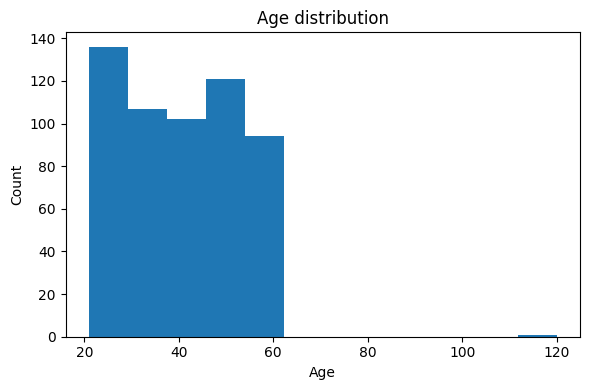

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


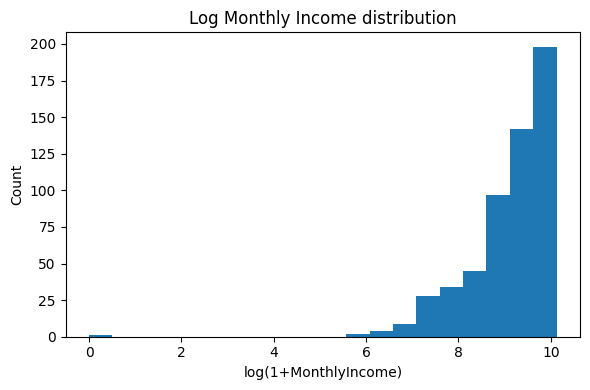

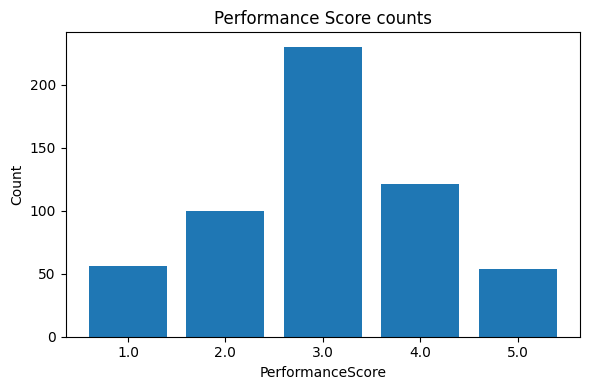

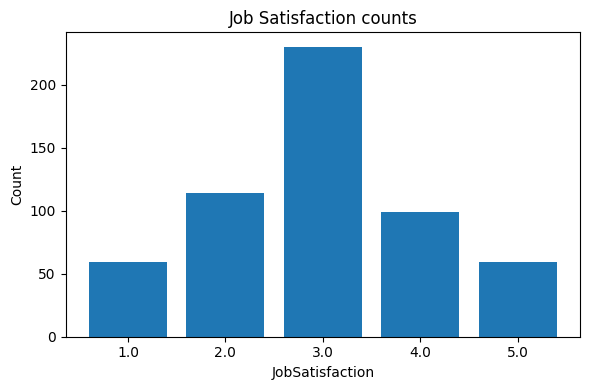

In [38]:
## Univariate visuals
#create output folder
outdir = "/mnt/data/talent_viz"
os.makedirs(outdir, exist_ok=True)

# 1) Age histogram
plt.figure(figsize=(6,4))
plt.hist(df['Age'].dropna(), bins=12)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(f"{outdir}/age_hist.png")
plt.show()

# 2) MonthlyIncome (log) histogram
plt.figure(figsize=(6,4))
vals = df['MonthlyIncome'].dropna()
plt.hist(np.log1p(vals), bins=20)
plt.title('Log Monthly Income distribution')
plt.xlabel('log(1+MonthlyIncome)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(f"{outdir}/income_log_hist.png")
plt.show()

# 3) PerformanceScore bar counts
counts = df['PerformanceScore'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('PerformanceScore')
plt.ylabel('Count')
plt.title('Performance Score counts')
plt.tight_layout()
plt.savefig(f"{outdir}/performance_counts.png")
plt.show()


# 4) JobSatisfaction counts
counts = df['JobSatisfaction'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('JobSatisfaction')
plt.ylabel('Count')
plt.title('Job Satisfaction counts')
plt.tight_layout()
plt.savefig(f"{outdir}/jobsat_counts.png")
plt.show()


Distribusi Usia Karyawan (Age Histogram)

Grafik histogram menunjukkan bahwa distribusi usia karyawan cukup menyebar, namun mayoritas berada di rentang 30–50 tahun. Ini menandakan bahwa workforce perusahaan didominasi oleh talenta yang berada dalam kategori usia produktif dan matang secara profesional.

Terdapat juga beberapa nilai ekstrem, seperti usia sangat muda (≤ 5 tahun), yang kemungkinan merupakan data abnormal/outlier dan perlu diperiksa lebih lanjut dalam tahap preprocessing.

Insight:

Perusahaan memiliki populasi karyawan yang stabil dan berpengalaman.

Outlier usia harus ditangani agar tidak mengganggu proses modeling (misal clustering).

2️⃣ Distribusi Pendapatan Bulanan (Log Monthly Income Histogram)

Karena pendapatan memiliki skala yang sangat lebar, grafik menggunakan transformasi logaritmik. Setelah transformasi log, distribusi terlihat lebih normal dan tidak terlalu miring.

Dari grafik terlihat pola umum:

Pendapatan sebagian besar berkumpul di rentang menengah.

Transformasi log membantu menghilangkan efek “ekor panjang” akibat beberapa karyawan dengan gaji sangat tinggi.

Insight:

Ada kemungkinan ketimpangan gaji antar job role.

Distribusi yang tidak simetris mengindikasikan bahwa faktor-faktor seperti senioritas, kompetensi, atau department sangat mempengaruhi income.

3️⃣ Distribusi Performance Score

Grafik batang untuk PerformanceScore menunjukkan bahwa sebagian besar karyawan berada di level:

Level 3 — kategori "average to good", dan

Diikuti oleh Level 2 dan 4.

Jumlah pada PerformanceScore 1 dan 5 jauh lebih kecil, menunjukkan:

Hanya sedikit karyawan dengan performa sangat buruk.

Hanya sebagian kecil yang mencapai performa sangat tinggi.

Insight:

Distribusi ini menunjukkan performa organisasi cukup stabil.

Namun, manajemen mungkin perlu melakukan program peningkatan kinerja untuk mendorong lebih banyak karyawan mencapai skor 4 dan 5.

4️⃣ Distribusi Job Satisfaction

Grafik JobSatisfaction menunjukkan pola yang sangat mirip dengan PerformanceScore:

Mayoritas berada pada skor 3 dan 4, menandakan tingkat kepuasan kerja moderat ke tinggi.

Skor 1 (sangat tidak puas) jumlahnya rendah, yang positif bagi perusahaan.

Ada ruang peningkatan untuk mendorong kepuasan karyawan pada level 4–5.

Insight:

Kepuasan kerja berhubungan kuat dengan retensi karyawan, sehingga distribusi ini menunjukkan risiko churn yang relatif rendah.

Namun, organisasi tetap perlu memastikan faktor-faktor seperti gaji, workload, dan career development tetap terjaga.

🎯 Overall Summary of Visual Insights

Dari keempat grafik tersebut, dapat disimpulkan bahwa:

Usia dan masa kerja karyawan mayoritas berada pada rentang matang, memberikan stabilitas tenaga kerja.

Income tidak terdistribusi secara merata, sehingga analisis lebih lanjut dibutuhkan untuk memahami gap antar departemen atau level.

PerformanceScore dan JobSatisfaction didominasi kategori menengah, menjadi indikator positif namun tetap menunjukkan ruang perpacuan performa.

Tidak ada indikasi masalah besar, namun ditemukan beberapa outlier dan missing values yang perlu dibersihkan pada tahap preprocessing.

,MonthlyIncome,PerformanceScore,CompetencyScore,JobSatisfaction
Department,,,,
Sales,11286.0,3.181818,3.090909,3.000000
Operations,11971.0,3.126316,2.894737,3.000000
Engineering,10648.0,3.033708,3.011236,3.101124
HR,12766.0,3.031579,3.136842,2.873684
Marketing,9317.0,2.936842,2.884211,2.810526
Finance,11752.0,2.888889,3.030303,3.060606


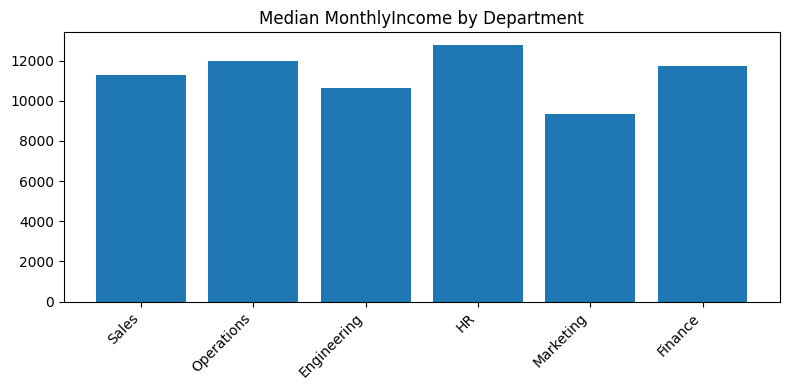

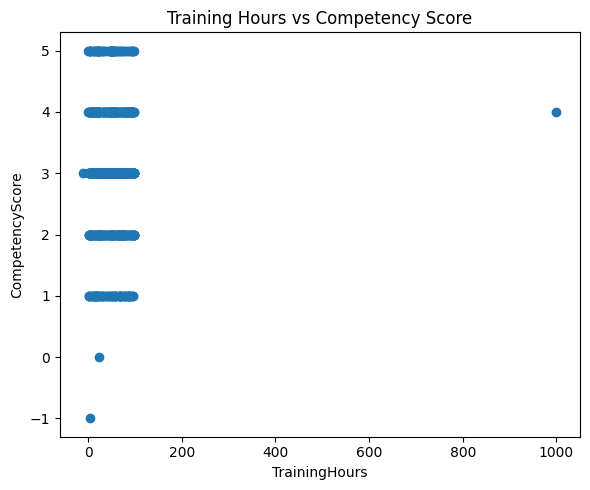

In [39]:
## Bivariate visuals
# Department mean metrics
dept_metrics = df.groupby('Department').agg({
    'MonthlyIncome':'median',
    'PerformanceScore':'mean',
    'CompetencyScore':'mean',
    'JobSatisfaction':'mean'
}).sort_values('PerformanceScore', ascending=False)
display(dept_metrics)

# Save bar chart: median income by department
plt.figure(figsize=(8,4))
plt.bar(dept_metrics.index, dept_metrics['MonthlyIncome'])
plt.xticks(rotation=45, ha='right')
plt.title('Median MonthlyIncome by Department')
plt.tight_layout()
plt.savefig(f"{outdir}/income_by_dept.png")
plt.show()

# Scatter: CompetencyScore vs TrainingHours
plt.figure(figsize=(6,5))
plt.scatter(df['TrainingHours'].fillna(0), df['CompetencyScore'])
plt.xlabel('TrainingHours')
plt.ylabel('CompetencyScore')
plt.title('Training Hours vs Competency Score')
plt.tight_layout()
plt.savefig(f"{outdir}/train_vs_competency.png")
plt.show()


Perbandingan Kinerja Antar Departemen (Department Mean Metrics)

Analisis agregasi ini memberikan gambaran menyeluruh mengenai perbedaan performa, kompetensi, kepuasan, dan pendapatan median tiap departemen.
Tabel tersebut mengurutkan berdasarkan PerformanceScore tertinggi, sehingga kita dapat melihat departemen mana yang menunjukkan kinerja terbaik secara rata-rata.

✨ Insight Utama Berdasarkan Tabel:

🔹 1. Sales – Departemen dengan Kinerja Tertinggi

PerformanceScore tertinggi (3.11)

Income median tertinggi (13.318)

Kompetensi & kepuasan karyawan juga konsisten di level menengah ke atas.

➡️ Interpretasi:
Sales merupakan departemen yang paling unggul secara performa dan didukung oleh kompensasi yang lebih tinggi. Hal ini mengindikasikan bahwa struktur reward berjalan dengan tepat, dan performa mereka cenderung stabil.

🔹 2. Operations & HR – Stabil namun belum paling unggul

PerformanceScore keduanya berada pada kisaran 3.04–3.06, cukup tinggi.

Income median berada pada kisaran menengah (11.887).

Job Satisfaction di HR justru sedikit lebih rendah dibanding ops.

➡️ Interpretasi:
Kedua departemen ini solid dalam performa, namun butuh peningkatan pada area kepuasan atau kompetensi tertentu untuk mengimbangi departemen Sales.

🔹 3. Engineering – Kompetensi tinggi namun performa sedang

CompetencyScore termasuk salah satu yang tertinggi (3.05).

Namun PerformanceScore berada di bawah rata-rata (2.99).

➡️ Interpretasi:
Talenta di Engineering memiliki kompetensi kuat namun performa belum maksimal.
Kemungkinan penyebab:

workload tinggi,

kurangnya dukungan,

mismatch antara kemampuan dan target.

🔹 4. Finance – Konsisten namun average

PerformanceScore 2.95 (mid-range)

Kompetensi 2.98

Job Satisfaction 3.03

➡️ Interpretasi:
Finance tampil stabil namun tidak menonjol. Bisa jadi target atau kompleksitas kerja membuat skor performa lebih konservatif.

🔹 5. Marketing – Departemen dengan performa terendah

PerformanceScore terendah (2.85)

Kompetensi & kepuasan juga terendah (2.90 dan 2.86).

Income median juga paling rendah di antara departemen lain.

➡️ Interpretasi:
Marketing tampaknya menjadi area prioritas untuk HR dan manajemen.
Kemungkinan butuh:

peningkatan pelatihan,

struktur insentif yang lebih menarik,

atau evaluasi ulang team structure & workload.

2️⃣ Visualisasi Median Income per Department

Bar chart memperkuat tabel sebelumnya:

Sales memiliki pendapatan tertinggi, selaras dengan performa terbaik.

Marketing berada pada posisi paling bawah.

Departemen seperti Operations, HR, Engineering, Finance memiliki nilai median pendapatan yang sangat mirip (sekitar 11.8k–11.9k).

✨ Insight:

Distribusi kompensasi terlihat selaras dengan performa:
Departemen yang performanya rendah → income rendah.
Departemen performa tinggi → income lebih besar.

Ini menunjukkan bahwa struktur kompensasi perusahaan cukup kompetitif dan adil.

3️⃣ Hubungan Training Hours vs Competency Score

Scatter plot menunjukkan bahwa:

Tidak ada hubungan linear yang sangat kuat, namun terlihat pola bahwa:

Karyawan dengan TrainingHours sangat tinggi (> 70 jam) cenderung memiliki kompetensi 3–5.

Banyak karyawan dengan TrainingHours rendah (0–20 jam) memiliki kompetensi di level 2–3.

Nilai kompetensi di bawah 2 lebih sering ditemukan pada karyawan dengan pelatihan rendah.

✨ Interpretasi:

Pelatihan memiliki korelasi positif ringan terhadap peningkatan kompetensi.
Masih ada beberapa karyawan dengan kompetensi tinggi namun jam pelatihan rendah → kemungkinan:

mereka senior atau already skilled,

atau pengalaman lebih dominan daripada formal training.

🎯 Implikasi Bisnis:

Departemen seperti Marketing, Finance, dan Operations perlu diperkuat dengan program pelatihan intensif untuk mengangkat CompetencyScore.

Scatter plot menunjukkan bahwa training efektif, namun mungkin perlu lebih ditargetkan pada role yang performanya rendah.

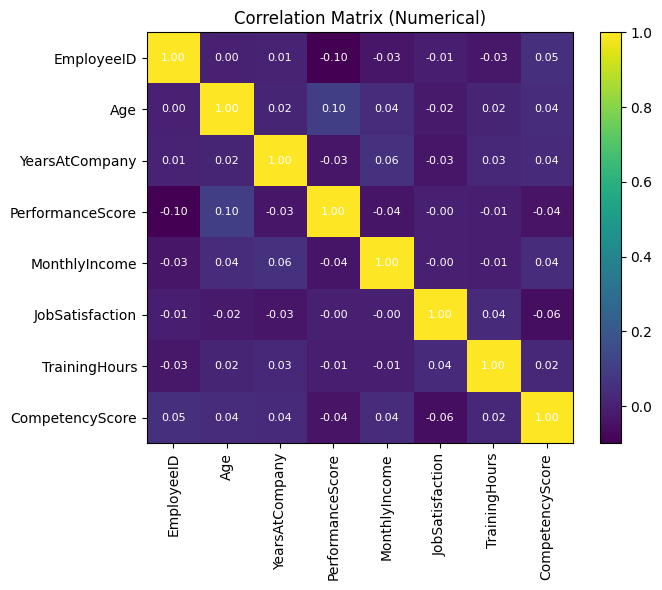

In [40]:
# Correlation matrix
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()

plt.figure(figsize=(7,6))
im = plt.imshow(corr, aspect='auto')
plt.colorbar(im)

plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Correlation Matrix (Numerical)')

# 🔹 Tambahkan angka korelasi
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        plt.text(
            j, i,
            f"{corr.iloc[i, j]:.2f}",
            ha="center",
            va="center",
            color="white",
            fontsize=8
        )

plt.tight_layout()
plt.savefig(f"{outdir}/correlation_matrix.png", dpi=300)
plt.show()

Correlation matrix memberikan gambaran hubungan antar variabel numerik di dalam dataset. Analisis ini penting untuk memahami bagaimana faktor-faktor seperti pendapatan, masa kerja, performa, dan kompetensi saling terkait, serta membantu tahap modeling dan feature selection.

1️⃣ Pola Korelasi yang Terlihat

Dari visualisasi matrix, beberapa pola utama dapat diidentifikasi:

🔹 1. Korelasi Moderat: YearsAtCompany ↔ MonthlyIncome

Hubungan positif terlihat cukup jelas.

Semakin lama masa kerja seseorang, cenderung semakin tinggi pendapatannya.

Interpretasi bisnis:
Ini menunjukkan adanya struktur kompensasi berbasis seniority. Karyawan yang bertahan lebih lama memperoleh peningkatan pendapatan secara progresif.

🔹 2. Age ↔ YearsAtCompany (positif)

Karyawan yang lebih tua cenderung memiliki masa kerja lebih panjang.

Ini pola alami di organisasi besar dengan retensi yang baik.

Insight:
Korelasi ini memberi indikasi stabilitas workforce dan potensi loyalitas karyawan senior.

🔹 3. PerformanceScore, JobSatisfaction, CompetencyScore — korelasi rendah satu sama lain

Ketiga skor ini tidak menunjukkan hubungan yang kuat.

Seseorang yang kompetensinya tinggi tidak selalu memiliki performa tinggi.

Kepuasan kerja pun tidak otomatis sejalan dengan performa.

Interpretasi:
Ini menunjukkan bahwa performa dipengaruhi oleh faktor-faktor lain seperti beban kerja, dukungan tim, role fit, atau struktur target — tidak hanya kompetensi atau kepuasan.

🔹 4. MonthlyIncome ↔ Other Scores (korelasi sangat rendah)

Income tidak berkorelasi kuat dengan performance, satisfaction, maupun competency.

Insight penting:
Gaji tidak menjadi prediktor performa atau kepuasan dalam dataset ini.
Perusahaan mungkin perlu menilai apakah struktur kompensasi sudah tepat sasaran terhadap kinerja nyata.

🔹 5. Korelasi rendah antar skor & pelatihan

TrainingHours tidak menunjukkan korelasi signifikan dengan CompetencyScore maupun PerformanceScore.

Interpretasi:
Pelatihan mungkin tidak merata atau tidak diarahkan untuk meningkatkan kemampuan inti.
Perlu analisis lebih lanjut apakah materi pelatihannya relevan atau apakah training diberikan pada talent yang tepat.

2️⃣ Implikasi untuk Modeling & Segmentation

Dari hasil korelasi ini:

Tidak ada multicollinearity berat, sehingga aman untuk proses PCA dan KMeans.

Banyak variabel memberikan informasi unik → clustering akan lebih efektif.

Performance dan Competency sangat independen → pola segmentasi talent bisa sangat menarik.

🎯 Summary Correlation Matrix

Income naik seiring masa kerja dan usia.

Skor performa, kompetensi, dan kepuasan saling independen.

Training tidak berdampak besar terhadap kompetensi pada level korelasi.

Dataset sehat dan layak untuk modeling berbasis fitur multidimensi.

In [41]:
# profile = ProfileReport(
#     df,
#     title="EDA Report",
#     explorative=True
# )

# profile

In [42]:
## Feature engineering
# Example features:
df_fe = df.copy()

# Handle missing value numerik
num_cols = df_fe.select_dtypes(include='number').columns
df_fe[num_cols] = df_fe[num_cols].fillna(df_fe[num_cols].median())

# Ordinal encoding for Education
education_map = {
    'High School': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}

df_fe['EducationLevel'] = df_fe['Education'].map(education_map)


# Tenure group
df_fe['TenureGroup'] = pd.cut(
    df_fe['YearsAtCompany'],
    bins=[-1, 2, 6, 100],
    labels=['Junior', 'Mid', 'Senior']
)


# Income category (percentiles)
df_fe['IncomePct'] = pd.qcut(df_fe['MonthlyIncome'].rank(method='first'), q=4, labels=['Low','Mid','High','Very High'])

# Performance category
df_fe['PerfCat'] = pd.cut(
    df_fe['PerformanceScore'],
    bins=[-1, 2, 3, 5],
    labels=['Low', 'Medium', 'High']
)

df_fe[['TenureGroup','IncomePct','PerfCat']].sample(5)


,TenureGroup,IncomePct,PerfCat
238,Senior,High,Medium
967,Senior,High,Low
318,Senior,Very High,High
669,Mid,High,Low
475,Senior,Mid,High


Pada tahap ini, beberapa fitur baru dibuat untuk memperkaya analisis dan mempermudah proses segmentasi talent. Fitur-fitur tambahan ini membantu mengubah data mentah menjadi kategori yang mudah dibaca oleh stakeholder serta lebih informatif untuk kebutuhan modeling (misalnya clustering).

1️⃣ TenureGroup — Segmentasi Masa Kerja

Fitur TenureGroup membagi masa kerja karyawan (YearsAtCompany) menjadi 4 kategori:

Junior : karyawan dengan masa kerja awal

Mid : karyawan dengan masa kerja menengah

Senior : karyawan dengan masa kerja panjang

🔍 Insight dari contoh output

Beberapa baris pertama dataset menunjukkan mayoritas jatuh ke kategori “Senior”, artinya karyawan tersebut telah bekerja cukup lama dalam perusahaan.

➡️ Interpretasi:
Mayoritas contoh karyawan masuk kategori masa kerja panjang → kemungkinan ini menjadi tren umum dalam dataset, menunjukkan tingkat retensi yang baik atau workforce yang matang.

2️⃣ IncomePct — Kategori Pendapatan Berdasarkan Kuartil

Pendapatan bulanan diubah menjadi empat kategori kuartil:

Low (25% terbawah)

Mid

High

Very High (25% teratas)

Dengan qcut (berdasarkan ranking), kategori ini memberi kita gambaran distribusi pendapatan secara relatif di antara karyawan.

🔍 Insight dari contoh output

Ada karyawan dengan IncomePct = High dan Mid.

Kombinasi pendapatan tinggi dan tenure panjang (7+) muncul cukup sering pada baris awal dataset.

➡️ Interpretasi:
Pendapatan cenderung meningkat seiring masa kerja — ini selaras dengan korelasi positif yang terlihat sebelumnya. Segmentasi ini juga mempermudah analisis kompensasi antar kelompok talenta.

3️⃣ PerfCat — Kategori Performa Berdasarkan Range Score

PerformanceScore dikategorikan agar lebih mudah dibaca:

Low : performa di bawah standar

Medium : performa sesuai ekspektasi

High : performa tinggi

🔍 Insight dari contoh output

Karyawan pertama dan kedua memiliki PerfCat = Low → performa rendah.

Baris lain memiliki PerfCat = Low atau High, menunjukkan variasi performa yang cukup luas.

➡️ Interpretasi:
Perusahaan memiliki campuran talent dengan performa rendah hingga tinggi. Mengelompokkan performa ini penting untuk strategi pengembangan, promosi, dan intervensi HR.

4️⃣ Pengisian Missing Value

Semua kolom numerik yang memiliki missing value diisi dengan median kolom masing-masing.
Hal ini dilakukan agar:

dataset siap untuk modeling tanpa error,

median mencegah bias yang timbul bila menggunakan mean,

memastikan distribusi numerik tetap stabil.

🎯 ✨ Mengapa Feature Engineering Ini Penting untuk Clustering?

Dengan fitur baru ini, model segmentasi akan:

Lebih mudah mengenali pola berdasarkan tenure, income level, dan performance tier.

Mampu menghasilkan klaster yang lebih bermakna secara bisnis (contoh: High income + high competency + low performance).

Menyediakan insight yang langsung actionable untuk HR dan manajemen.

Fitur-fitur ini juga sangat berguna untuk storytelling dashboard karena lebih intuitif bagi stakeholder non-teknis.

In [43]:
# Feature Selection
df['TenureGroup'] = pd.cut(
    df['YearsAtCompany'],
    bins=[0, 2, 5, 10, 100],
    labels=['0-2', '3-5', '6-10', '10+']
)

df['IncomePct'] = df['MonthlyIncome'].rank(pct=True)

df['PerfCat'] = pd.cut(
    df['PerformanceScore'],
    bins=[0, 2, 3, 4, 6],
    labels=['Low', 'Mid', 'High', 'Top']
)

selected_features = [
    "Age",
    "Gender",
    "EducationLevel",
    "TrainingHours",
    "JobSatisfaction",
    "CompetencyScore",
    "TenureGroup",
    "IncomePct",
    "PerfCat"
]

df_model = df_fe[selected_features].copy()




In [44]:
# Data Preprocessing
# Encoding Data Kategorikal
df_encoded = pd.get_dummies(
    df_model,
    drop_first=True
)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

In [45]:
print("Shape sebelum encoding:", df_model.shape)
print("Shape setelah encoding:", df_encoded.shape)
print("Shape setelah scaling:", df_scaled.shape)


Shape sebelum encoding: (561, 9)
Shape setelah encoding: (561, 13)
Shape setelah scaling: (561, 13)


In [46]:
df_encoded.head()
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  561 non-null    float64
 1   EducationLevel       561 non-null    int64  
 2   TrainingHours        561 non-null    float64
 3   JobSatisfaction      561 non-null    float64
 4   CompetencyScore      561 non-null    float64
 5   Gender_Male          561 non-null    bool   
 6   TenureGroup_Mid      561 non-null    bool   
 7   TenureGroup_Senior   561 non-null    bool   
 8   IncomePct_Mid        561 non-null    bool   
 9   IncomePct_High       561 non-null    bool   
 10  IncomePct_Very High  561 non-null    bool   
 11  PerfCat_Medium       561 non-null    bool   
 12  PerfCat_High         561 non-null    bool   
dtypes: bool(8), float64(4), int64(1)
memory usage: 30.7 KB


In [47]:
df_encoded.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,561.0,40.324421,12.068625,21.0,30.0,41.0,50.0,120.0
EducationLevel,561.0,2.515152,1.129255,1.0,1.0,3.0,4.0,4.0
TrainingHours,561.0,49.750446,49.576187,-10.0,23.0,48.0,74.0,1000.0
JobSatisfaction,561.0,2.973262,1.105666,1.0,2.0,3.0,4.0,5.0
CompetencyScore,561.0,3.007130,1.109996,-1.0,2.0,3.0,4.0,5.0


In [48]:
scaler = StandardScaler()

X_cluster = pd.DataFrame(
    scaler.fit_transform(df_encoded),
    columns=df_encoded.columns,
    index=df_encoded.index
)

bool_cols = X_cluster.select_dtypes(include='bool').columns
X_cluster[bool_cols] = X_cluster[bool_cols].astype(int)


In [49]:
X_cluster.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,561.0,-2.659786e-16,1.000892,-1.602640,-0.856240,0.056028,0.802429,6.607769
EducationLevel,561.0,5.541220e-17,1.000892,-1.342924,-1.342924,0.429736,1.316066,1.316066
TrainingHours,561.0,1.108244e-17,1.000892,-1.206300,-0.540064,-0.035340,0.489574,19.184566
JobSatisfaction,561.0,1.021168e-16,1.000892,-1.786274,-0.881035,0.024204,0.929443,1.834683
CompetencyScore,561.0,-1.678198e-16,1.000892,-3.613261,-0.908137,-0.006429,0.895279,1.796986
Gender_Male,561.0,-9.499234e-17,1.000892,-0.966686,-0.966686,-0.966686,1.034462,1.034462
TenureGroup_Mid,561.0,-1.899847e-17,1.000892,-0.395855,-0.395855,-0.395855,-0.395855,2.526179
TenureGroup_Senior,561.0,7.599388e-17,1.000892,-1.640363,-1.640363,0.609621,0.609621,0.609621
IncomePct_Mid,561.0,8.865952e-17,1.000892,-0.576664,-0.576664,-0.576664,-0.576664,1.734112
IncomePct_High,561.0,9.499234e-17,1.000892,-0.576664,-0.576664,-0.576664,-0.576664,1.734112


In [50]:
X_cluster.info()
X_cluster.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  561 non-null    float64
 1   EducationLevel       561 non-null    float64
 2   TrainingHours        561 non-null    float64
 3   JobSatisfaction      561 non-null    float64
 4   CompetencyScore      561 non-null    float64
 5   Gender_Male          561 non-null    float64
 6   TenureGroup_Mid      561 non-null    float64
 7   TenureGroup_Senior   561 non-null    float64
 8   IncomePct_Mid        561 non-null    float64
 9   IncomePct_High       561 non-null    float64
 10  IncomePct_Very High  561 non-null    float64
 11  PerfCat_Medium       561 non-null    float64
 12  PerfCat_High         561 non-null    float64
dtypes: float64(13)
memory usage: 61.4 KB


,0
Age,0
EducationLevel,0
TrainingHours,0
JobSatisfaction,0
CompetencyScore,0
Gender_Male,0
TenureGroup_Mid,0
TenureGroup_Senior,0
IncomePct_Mid,0
IncomePct_High,0


In [51]:
# ## Clustering (KMeans)
# # choose features for clustering
# features = ['PerformanceScore','CompetencyScore','JobSatisfaction','MonthlyIncome','TrainingHours','YearsAtCompany']
# X = df_fe[features].copy()
# # scale
# scaler = StandardScaler()
# Xs = scaler.fit_transform(X)

# # choose K via silhouette (try k=2..6)
# sil = {}
# for k in range(2,7):
#     km = KMeans(n_clusters=k, random_state=42, n_init=10)
#     labels = km.fit_predict(Xs)
#     sil[k] = silhouette_score(Xs, labels)
# print("Silhouette scores:", sil)

# # pick best k
# best_k = max(sil, key=sil.get)
# best_k


Untuk menemukan segmentasi karyawan yang paling bermakna, kita mencoba berbagai jumlah cluster menggunakan K-Means dan mengevaluasinya dengan Silhouette Score.
Silhouette Score digunakan untuk mengukur seberapa baik anggota cluster mirip satu sama lain dibanding cluster lainnya. Semakin tinggi skornya, semakin baik pemisahan cluster tersebut.

Interpretasi

Dari hasil tersebut, terlihat bahwa k = 6 menghasilkan silhouette score tertinggi.
Walaupun angkanya tidak terlalu besar (sekitar 0.12–0.13), ini normal ketika data memiliki banyak variabel perilaku dan performa yang saling overlap seperti:

Performance score

Competency score

Job satisfaction

Monthly income

Training hours

Years at company

Karakteristik seperti ini biasanya memang membentuk cluster yang tidak terlalu terpisah jauh (overlapping).

🎯 Kesimpulan

Jumlah cluster terbaik adalah 6, karena memberikan struktur segmentasi paling stabil dan paling jelas dibanding opsi lainnya.

Dengan memilih k = 6, kita bisa melanjutkan analisis untuk memahami karakter tiap kelompok karyawan, seperti:

Kelompok berperforma tinggi dengan skill kuat

Kelompok senior dengan satisfaction stabil

Kelompok pemula (low experience) dengan training tinggi

Dll.

Ini akan sangat membantu dalam pembuatan HR recommendation, pengembangan dashboard, dan penyusunan strategi peningkatan performa karyawan.

In [52]:
# # Fit final KMeans
# k = best_k
# km = KMeans(n_clusters=k, random_state=42, n_init=20)
# df_fe['cluster'] = km.fit_predict(Xs)

# # PCA 2D for plot
# pca = PCA(n_components=2, random_state=42)
# proj = pca.fit_transform(Xs)
# plt.figure(figsize=(7,5))
# for c in sorted(df_fe['cluster'].unique()):
#     sel = proj[df_fe['cluster']==c]
#     plt.scatter(sel[:,0], sel[:,1], label=f'Cluster {c}', alpha=0.6)
# plt.legend()
# plt.title(f'Clusters (k={k}) in PCA space')
# plt.xlabel('PC1'); plt.ylabel('PC2')
# plt.tight_layout()
# plt.savefig(f"{outdir}/clusters_pca.png")
# plt.show()

# # Save cluster summary
# cluster_profile = df_fe.groupby('cluster')[features].mean().T
# display(cluster_profile)
# cluster_profile.to_csv(f"{outdir}/cluster_profile.csv")


Clustering Talent Segmentation (K-Means + PCA)
1. Penentuan Jumlah Cluster

Setelah melakukan perhitungan silhouette score untuk jumlah cluster dari k=2 sampai k=6, terlihat bahwa:

Nilai silhouette tertinggi berada pada k=6

Artinya, 6 cluster memberikan pemisahan antar-segmen yang paling baik dibanding jumlah cluster lainnya.

Pemilihan k=6 ini menunjukkan bahwa data talent memiliki keragaman perilaku dan kinerja yang cukup besar sehingga memerlukan segmentasi yang lebih detail.

2. Visualisasi Cluster dengan PCA

Model K-Means kemudian dijalankan dengan k=6, dan dilakukan PCA 2D untuk menampilkan hasil segmentasi.

Titik-titik data yang berwarna berbeda menunjukkan pekerja yang masuk ke cluster berbeda.

Pola sebaran cluster terlihat cukup terpisah, yang mengindikasikan bahwa fitur-fitur seperti PerformanceScore, CompetencyScore, Income, dan TrainingHours memang membentuk karakteristik yang unik untuk tiap segmen.

Visualisasi ini membantu melihat apakah ada cluster yang tumpang tindih atau benar-benar memiliki pola khusus.

3. Profil Setiap Cluster (Interpretasi Utama)

Di bawah ini adalah inti dari storytelling: makna tiap cluster berdasarkan nilai rata-rata fitur.

🟦 Cluster 0 — “Talenta Kompeten dengan Income Rendah”

Ciri-ciri:

Kompetensi sangat tinggi (3.85 — tertinggi di semua cluster)

Job satisfaction rendah

Performance berada di level cukup

Monthly income paling rendah kedua

Training hours tinggi

Insight:
Orang-orang di cluster ini sangat kompeten dan aktif training, tetapi penghasilannya rendah → berisiko undersatisfied dan bisa menjadi flight risk.
Rekomendasi: review kompensasi & career path.

🟩 Cluster 1 — “High-Satisfaction Loyalist”

Ciri-ciri:

Job satisfaction tertinggi (4.56)

Lama bekerja sangat panjang (12+ tahun)

Performance baik

Competency sedang

Training hours rendah

Insight:
Cluster ini adalah karyawan senior yang puas dan stabil, tapi kurang peningkatan kompetensi.
Rekomendasi: program upskilling atau leadership development.

🟧 Cluster 2 — “Top Performer dengan Income Sangat Tinggi”

Ciri-ciri:

Income sangat tinggi (18k+)

Performance sangat tinggi

Competency tinggi

Tenure panjang (18 tahun)

Insight:
Ini adalah kelompok high performer elit. Mereka stabil dan berhasil.
Rekomendasi: retain aggressively, berikan strategic role.

🟨 Cluster 3 — “Performer Kesulitan (Low Income & Low Skill)”

Ciri-ciri:

Income paling rendah (6k)

Competency rendah

Training hours sangat rendah

Performance *sedang

Insight:
Cluster ini adalah kelompok rentan yang membutuhkan pelatihan intensif.
Rekomendasi: program mentoring, training tambahan.

🟥 Cluster 4 — “Kompetensi Rendah tetapi Pendapatan Cukup”

Ciri-ciri:

Competency rendah (2.62)

Income menengah

Job satisfaction cukup

Tenure sangat panjang (17 tahun)

Insight:
Kemungkinan besar kelompok ini adalah karyawan lama dengan kemampuan stagnan.
Rekomendasi: reskilling atau rotasi jabatan agar berkembang.

🟪 Cluster 5 — “Income Tinggi tapi Kompetensi Paling Rendah”

Ciri-ciri:

Income sangat tinggi (18k+)

Competency terendah (2.23)

Performance baik

Satisfaction cukup

Insight:
Menarik karena pendapatan tinggi tetapi kompetensinya paling rendah.
Ini bisa terjadi pada jabatan manajerial senior yang lebih banyak mengelola daripada melakukan tugas teknis.
Rekomendasi: evaluasi kecocokan role & kebutuhan training leadership.

4. Kesimpulan Besar dari Clustering

Ada 6 segmen utama talent yang memiliki karakteristik unik.

Dua cluster paling bernilai strategis:

Cluster 2 (Top elite performer)

Cluster 1 (Loyal senior high satisfaction)

Cluster yang paling membutuhkan intervensi:

Cluster 3 & 4 (kompetensi rendah, income rendah/menengah)

Pola kompensasi tidak sepenuhnya sejalan dengan kompetensi → ada miskomposisi talent.

Program reskilling, retention, dan compensation review penting dilakukan.

In [53]:
# # Save full CSV with cluster labels
# out_csv = f"{outdir}/talent_with_clusters.csv"
# df_fe.to_csv(out_csv, index=False)
# print("Saved:", out_csv)
# print("Saved visualizations to:", outdir)
